In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
# 1. 데이터 불러오기
x_iqr = pd.read_csv("x_iqr.csv")
y_iqr = pd.read_csv("y_iqr.csv")

In [98]:
y = y_iqr.iloc[:,0]

In [99]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler

# 학습 : 검증 : 테스트 = 6 : 3 : 1 데이터 분리
X_train, X_valid, Y_train, Y_valid = train_test_split(x_iqr.values, y_scaled.values, test_size=0.4, random_state=2021)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_valid, Y_valid, test_size=0.25, random_state=2021)

# RobustScaler
Robust_scaler = RobustScaler()
Robust_scaler.fit(X_train)
X_train_RB = Robust_scaler.transform(X_train)
X_test_RB = Robust_scaler.transform(X_test)

# MaxAbsScaler
MA_scaler = MaxAbsScaler()
MA_scaler.fit(X_train)
X_train_MA = MA_scaler.transform(X_train)
X_test_MA = MA_scaler.transform(X_test)

# StandardScaler
StandardScaler = StandardScaler()
StandardScaler.fit(X_train)
X_train = StandardScaler.transform(X_train)
X_valid = StandardScaler.transform(X_valid)
X_test = StandardScaler.transform(X_test)

# Scaler를 바꿔보아도 결과 차이 크게 없단 것 보여주기!

In [100]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

=============Train=============
Training MSE : 1.114
Training RMSE : 1.055
Training MAE : 0.789
Training MAPE : 259.675
Training R2 : 0.216

=============Test=============
None
Testing MSE : 1.196
Testing RMSE : 1.094
Testing MAE : 0.811
Testing MAPE : 246.491
Testing R2 : 0.199


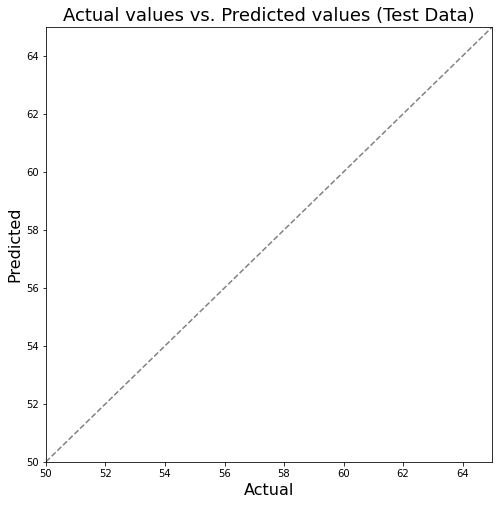

In [101]:
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression().fit(X_train, Y_train)

train_y_pred = model_LR.predict(X_train)

print('=============Train=============')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred)))

test_y_pred = model_LR.predict(X_test)

print('\n=============Test=============')
print('None')
print("Testing MSE : {:.3f}".format(mean_squared_error(Y_test, test_y_pred)))
print("Testing RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, test_y_pred))))
print("Testing MAE : {:.3f}".format(mean_absolute_error(Y_test, test_y_pred)))
print("Testing MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, test_y_pred)))
print("Testing R2 : {:.3f}".format(r2_score(Y_test, test_y_pred)))

plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (Test Data)', size=18)
plt.scatter(Y_test, test_y_pred)
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.axis([50, 65, 50, 65])
plt.plot([50, 65], [50, 65], color='grey', linestyle='dashed')
plt.show()

=============Train=============
Training MSE : 1.421
Training RMSE : 1.192
Training MAE : 0.885
Training MAPE : 100.457
Training R2 : 0.000

=============Test=============
None
Testing MSE : 1.494
Testing RMSE : 1.222
Testing MAE : 0.908
Testing MAPE : 100.444
Testing R2 : -0.000


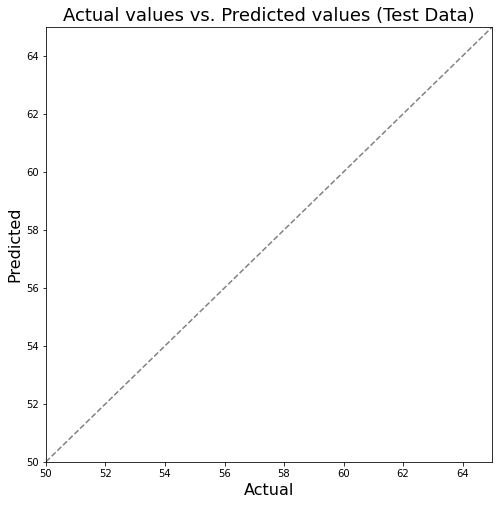

In [102]:
from sklearn.linear_model import Lasso

model_Lasso = Lasso().fit(X_train, Y_train)

train_y_pred = model_Lasso.predict(X_train)

print('=============Train=============')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred)))

test_y_pred = model_Lasso.predict(X_test)

print('\n=============Test=============')
print('None')
print("Testing MSE : {:.3f}".format(mean_squared_error(Y_test, test_y_pred)))
print("Testing RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, test_y_pred))))
print("Testing MAE : {:.3f}".format(mean_absolute_error(Y_test, test_y_pred)))
print("Testing MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, test_y_pred)))
print("Testing R2 : {:.3f}".format(r2_score(Y_test, test_y_pred)))

plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (Test Data)', size=18)
plt.scatter(Y_test, test_y_pred)
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.axis([50, 65, 50, 65])
plt.plot([50, 65], [50, 65], color='grey', linestyle='dashed')
plt.show()

=============Train=============
Training MSE : 1.114
Training RMSE : 1.056
Training MAE : 0.789
Training MAPE : 259.715
Training R2 : 0.216

=============Test=============
None
Testing MSE : 1.195
Testing RMSE : 1.093
Testing MAE : 0.811
Testing MAPE : 244.971
Testing R2 : 0.200


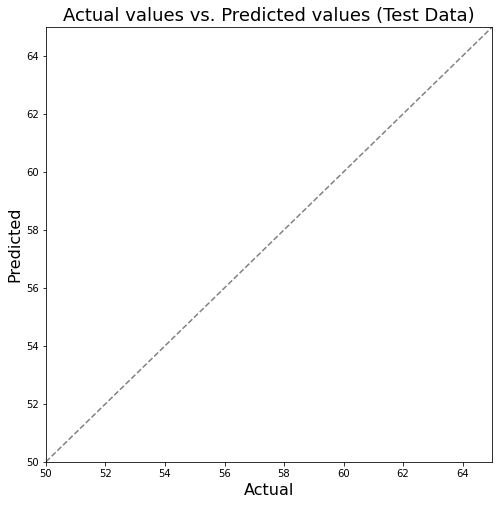

In [103]:
from sklearn.linear_model import Ridge

model_Ridge = Ridge().fit(X_train, Y_train)

train_y_pred = model_Ridge.predict(X_train)

print('=============Train=============')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred)))

test_y_pred = model_Ridge.predict(X_test)

print('\n=============Test=============')
print('None')
print("Testing MSE : {:.3f}".format(mean_squared_error(Y_test, test_y_pred)))
print("Testing RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, test_y_pred))))
print("Testing MAE : {:.3f}".format(mean_absolute_error(Y_test, test_y_pred)))
print("Testing MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, test_y_pred)))
print("Testing R2 : {:.3f}".format(r2_score(Y_test, test_y_pred)))

plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (Test Data)', size=18)
plt.scatter(Y_test, test_y_pred)
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.axis([50, 65, 50, 65])
plt.plot([50, 65], [50, 65], color='grey', linestyle='dashed')
plt.show()

=============Train=============
Training MSE : 1.421
Training RMSE : 1.192
Training MAE : 0.885
Training MAPE : 100.457
Training R2 : 0.000

=============Test=============
None
Testing MSE : 1.195
Testing RMSE : 1.093
Testing MAE : 0.811
Testing MAPE : 244.971
Testing R2 : 0.200


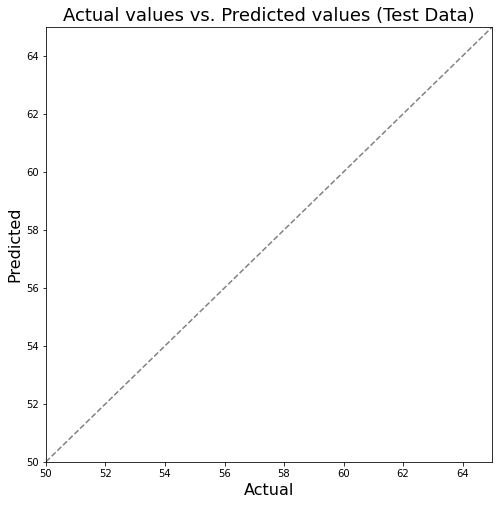

In [104]:
from sklearn.linear_model import ElasticNet

model_Elastic = ElasticNet().fit(X_train, Y_train)

train_y_pred = model_Elastic.predict(X_train)

print('=============Train=============')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred)))

test_y_pred = model_Ridge.predict(X_test)

print('\n=============Test=============')
print('None')
print("Testing MSE : {:.3f}".format(mean_squared_error(Y_test, test_y_pred)))
print("Testing RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, test_y_pred))))
print("Testing MAE : {:.3f}".format(mean_absolute_error(Y_test, test_y_pred)))
print("Testing MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, test_y_pred)))
print("Testing R2 : {:.3f}".format(r2_score(Y_test, test_y_pred)))

plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (Test Data)', size=18)
plt.scatter(Y_test, test_y_pred)
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.axis([50, 65, 50, 65])
plt.plot([50, 65], [50, 65], color='grey', linestyle='dashed')
plt.show()